<a href="https://colab.research.google.com/github/rvraghvender/DeepLearningProjects/blob/main/ConvolutionNeuralNetworks/ConvolutionNeuralNetworksApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 - TensorFlow model

Utilize the programming frameworks to perform convolution neural networks operations.

In [1]:
# import relevant packages
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
print('TensorFlow version: ',tf.__version__)

TensorFlow version:  2.12.0


## Load the dataset and split the data into Train/Test sets
Here Happy house dataset is given which contains images of people's faces. Build a ConvNet that determines whether the people in the images are smiling or not, because they only get to enter the house if they're similing.

In [49]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

In [50]:
# Normalize images vectors
X_train = X_train_orig / 255.0
X_test = X_test_orig / 255.0

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print("Number of training examples = " + str(X_train.shape[0]))
print("Number of test examples = " + str(X_test.shape[0]))
print("X_train shape " + str(X_train.shape))
print("Y_train shape " + str(Y_train.shape))
print("X_test shape " + str(X_test.shape))
print("Y_test shape " + str(Y_test.shape))

Number of training examples = 600
Number of test examples = 150
X_train shape (600, 64, 64, 3)
Y_train shape (600, 1)
X_test shape (150, 64, 64, 3)
Y_test shape (150, 1)


## Looking at particular example from dataset

Images are 64 x 64 pixels in RGB format (3 channels)

y = 1


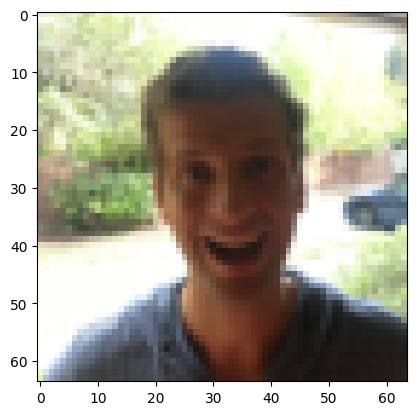

In [51]:
# Example of picture
index = 125
plt.imshow(X_train_orig[index])
print("y = " + str(np.squeeze(Y_train_orig[:, index])))

## Layers in TensorFlow Keras

In TF Keras, there is no need to write code directly to create layers. Rather, TF Keras has pre-defined layers that we can use. When we create a layer in TF Keras, we are creating a function that takes some input and transform it into an outupt that we can reuse later.

## The Sequential API

In previous projects, we built helper functions using numpy to understand the mechanics behind convolution neural networks. In most practical applications of deep learning today are built using programming frameworks, which have many built-in functions we can simply call. Keras is high-level abstraction built on top of TensorFlow, which allows for even more simplified and optimized model creation and training.

**Sequential API** -- It allows use to build layer by layer, and is ideal for building models where each layer has exactly one input tensor and one output tensor. It is only appropriate for simpler, more straightforward tasks.

## Creating the Sequential API
TensorFlow Keras Sequential API can be used to build simple with layer operations that proceed in sequential order. Here, we can add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, like a regular Python list.

In Sequential model layers acts as list. Like python lists, sequential layers are ordered, and the order in which they are specified matters. If our model is non-linear or contains layers with multiple inputs or outputs, a sequential model would'nt be the right choice.

For any layers construction in Keras, we need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor.



<a name='3-1'></a>
### 3.1 - Create the Sequential Model

As mentioned earlier, the TensorFlow Keras Sequential API can be used to build simple models with layer operations that proceed in a sequential order.

You can also add layers incrementally to a Sequential model with the `.add()` method, or remove them using the `.pop()` method, much like you would in a regular Python list.

Actually, you can think of a Sequential model as behaving like a list of layers. Like Python lists, Sequential layers are ordered, and the order in which they are specified matters.  If your model is non-linear or contains layers with multiple inputs or outputs, a Sequential model wouldn't be the right choice!

For any layer construction in Keras, you'll need to specify the input shape in advance. This is because in Keras, the shape of the weights is based on the shape of the inputs. The weights are only created when the model first sees some input data. Sequential models can be created by passing a list of layers to the Sequential constructor, like you will do in the next assignment.

<a name='ex-1'></a>
### Exercise 1 - happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation.


 **Hint:**

 Use **tfl** as shorthand for **tensorflow.keras.layers**

In [52]:
def happyModel():
    '''
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Args:
    None

    Returns:
    model - TF Keras model (object containing the information for the entire training process)
    '''
    model = tf.keras.Sequential([
                                tfl.ZeroPadding2D(padding = (3,3), input_shape=(64, 64, 3), data_format='channels_last'),
                                tfl.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1)),
                                tfl.BatchNormalization(axis=3),
                                tfl.ReLU(),
                                tfl.MaxPool2D(),
                                tfl.Flatten(),
                                tfl.Dense(units=1, activation='sigmoid')
    ])

    return model

In [53]:
happy_model = happyModel()

# Print summary for each layer
for layer in summary(happy_model):
    print(layer)

output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3,3), (3,3))],
          ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
          ['BatchNormalization', (None, 64, 64, 32), 128],
          ['ReLU', (None, 64, 64, 32), 0],
          ['MaxPooling2D', (None, 32, 32, 32), 0, (2,2), (2, 2), 'valid'],
          ['Flatten', (None, 32768), 0],
          ['Dense', (None, 1), 32769, 'sigmoid']]

comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


Having created the model, we can compile it for training with an optimizer and loss of our choice. When the string accuracy is specified as a metric, the type of accuracy used will be automatically converted on the loss function used.

In [54]:
happy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Let's check our model's parameters with `.summary()` method. This will display the types of layers we have, the shape of the outputs, and how many parameters are there in each layer.

In [55]:
happy_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_8 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_6 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

## Train and Evaluate the Model

First step before training the model is to do a sanity check on its contents of the model ccompiled using our choice of optimizer and loss functions.
Simply call `.fit()` to train. That's it! No need for mini-batching, saving, or complex backpropagation computations.

In [56]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 6s 133ms/step - loss: 0.8979 - accuracy: 0.7333
Epoch 2/10
38/38 [==============================] - 4s 108ms/step - loss: 0.1766 - accuracy: 0.9267
Epoch 3/10
38/38 [==============================] - 5s 128ms/step - loss: 0.1669 - accuracy: 0.9333
Epoch 4/10
38/38 [==============================] - 4s 108ms/step - loss: 0.1888 - accuracy: 0.9300
Epoch 5/10
38/38 [==============================] - 4s 107ms/step - loss: 0.1002 - accuracy: 0.9617
Epoch 6/10
38/38 [==============================] - 5s 130ms/step - loss: 0.0999 - accuracy: 0.9617
Epoch 7/10
38/38 [==============================] - 4s 105ms/step - loss: 0.0653 - accuracy: 0.9733
Epoch 8/10
38/38 [==============================] - 4s 106ms/step - loss: 0.0821 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - 5s 132ms/step - loss: 0.0552 - accuracy: 0.9817
Epoch 10/10
38/38 [==============================] - 4s 107ms/step - loss: 0.0702 - accuracy: 0.9800

After `.fit()` completes, just use `.evaluate()` to evaluate against test set. This function will print the value of the loss function (`binary_crossentropy`) and the performance metrics (`accuracy`) specified during the compilation of the model.

In [57]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 60ms/step - loss: 0.1625 - accuracy: 0.9267


[0.16253335773944855, 0.9266666769981384]

That's easy. But what if we need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautiful simple yet limited functionality, won't be able to help us.

Therefore, we use **Functional API**,slightly more complex but highly flexible friend.

## The Functional API

The Functional API can handle models with non-linear topology, shared layers, as well as layers with mulitple inputs or outputs. Imagine that,
*   where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility.
*   where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one (such as skip connections).

## Load the SIGNS dataset

In [7]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [13]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


y = 2


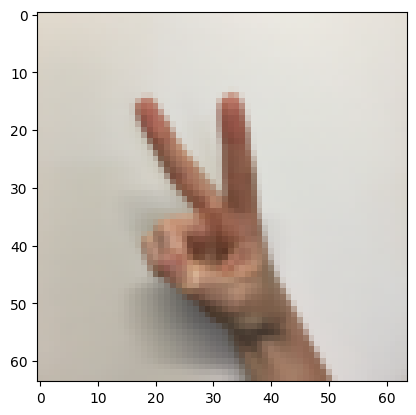

In [9]:
# Example of an image from the dataset
index = 4
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))


## Forward Propagation

In TensorFlow, there are built-in functions that implement the convolution steps for us. In the [Functional API](https://www.tensorflow.org/guide/keras/functional), we create a graph of layers. This is what allows such great flexibility.

However, the following model could also be defined using the Sequential API since the information flow is on a single line. But don't deviate. What we want is to learn to use the functional API.

Begin building our graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):**

Then, create a new node in the graph of layers by calling a layer on the `input_img` object:

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read the full documentation on [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples your input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, you usually operate on a single example at a time and a single channel at a time. Read the full documentation on [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). You can read the full documentation on [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.

    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  You can read the full documentation on [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. You can read the full documentation on [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In the last function above (`tf.keras.layers.Dense()`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need to initialize those weights when initializing the parameters.

Lastly, before creating the model, you'll need to define the output using the last of the function's compositions (in this example, a Dense layer):

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**


#### Window, kernel, filter, pool

The words "kernel" and "filter" are used to refer to the same thing. The word "filter" accounts for the amount of "kernels" that will be used in a single convolution layer. "Pool" is the name of the operation that takes the max or average value of the kernels.

This is why the parameter `pool_size` refers to `kernel_size`, and you use `(f,f)` to refer to the filter size.

Pool size and kernel size refer to the same thing in different objects - They refer to the shape of the window where the operation takes place.

## convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above!

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation.

In [10]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)

    # CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters=8, kernel_size=(4, 4), strides=(1,1), padding='same')(input_img)

    # RELU
    A1 = tfl.ReLU()(Z1)

    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)

    # CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters=16, kernel_size=(2, 2), strides=(1,1), padding='same')(P1)

    # RELU
    A2 = tfl.ReLU()(Z2)

    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding='same')(A2)

    # FLATTEN
    F  = tfl.Flatten()(P2)

    # Dense layer
    # 6 neurons in output layer.
    # Hint: one of the arguments should be "activation='softmax'"
    outputs= tfl.Dense(units=6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [11]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model!

## Train the model

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 139ms/step - loss: 1.8321 - accuracy: 0.1657 - val_loss: 1.7964 - val_accuracy: 0.2000
Epoch 2/100
17/17 [==============================] - 3s 145ms/step - loss: 1.7893 - accuracy: 0.1852 - val_loss: 1.7846 - val_accuracy: 0.2250
Epoch 3/100
17/17 [==============================] - 2s 116ms/step - loss: 1.7823 - accuracy: 0.1926 - val_loss: 1.7794 - val_accuracy: 0.2500
Epoch 4/100
17/17 [==============================] - 2s 117ms/step - loss: 1.7760 - accuracy: 0.2315 - val_loss: 1.7721 - val_accuracy: 0.2833
Epoch 5/100
17/17 [==============================] - 2s 113ms/step - loss: 1.7679 - accuracy: 0.2787 - val_loss: 1.7652 - val_accuracy: 0.3000
Epoch 6/100
17/17 [==============================] - 2s 117ms/step - loss: 1.7580 - accuracy: 0.3231 - val_loss: 1.7546 - val_accuracy: 0.2500
Epoch 7/100
17/17 [==============================] - 3s 167ms/step - loss: 1.7457 - accuracy: 0.3528 - val_loss: 1.7398 - val_accuracy: 0.3417

## History Object

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that we can retrieve at `history.history`:

In [15]:
history.history

{'loss': [1.8321231603622437,
  1.7892804145812988,
  1.7823383808135986,
  1.7759971618652344,
  1.7679498195648193,
  1.7580161094665527,
  1.745682716369629,
  1.7275999784469604,
  1.7034072875976562,
  1.6724945306777954,
  1.6339915990829468,
  1.5855077505111694,
  1.52778160572052,
  1.4670268297195435,
  1.4048562049865723,
  1.3461397886276245,
  1.2906712293624878,
  1.2386679649353027,
  1.1891980171203613,
  1.145391583442688,
  1.106337547302246,
  1.0728299617767334,
  1.0372862815856934,
  1.0083019733428955,
  0.9806002974510193,
  0.9543782472610474,
  0.9295121431350708,
  0.9111317992210388,
  0.889826774597168,
  0.87126225233078,
  0.8516678214073181,
  0.83720463514328,
  0.8209688663482666,
  0.8041795492172241,
  0.788386881351471,
  0.7740486264228821,
  0.7609509229660034,
  0.7496278285980225,
  0.7379167675971985,
  0.7253220677375793,
  0.7127917408943176,
  0.701450765132904,
  0.6909993886947632,
  0.6802900433540344,
  0.6697909832000732,
  0.6599253416

Now visualize the loss over time using `history.history`:

<ipython-input-16-957c1ea044b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-16-957c1ea044b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

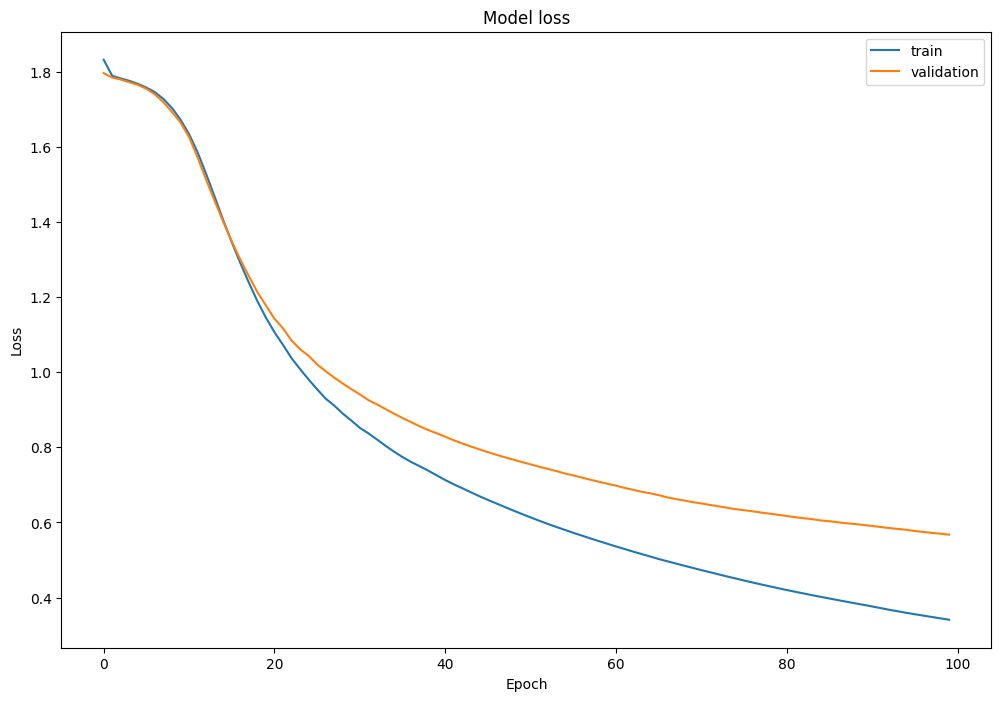

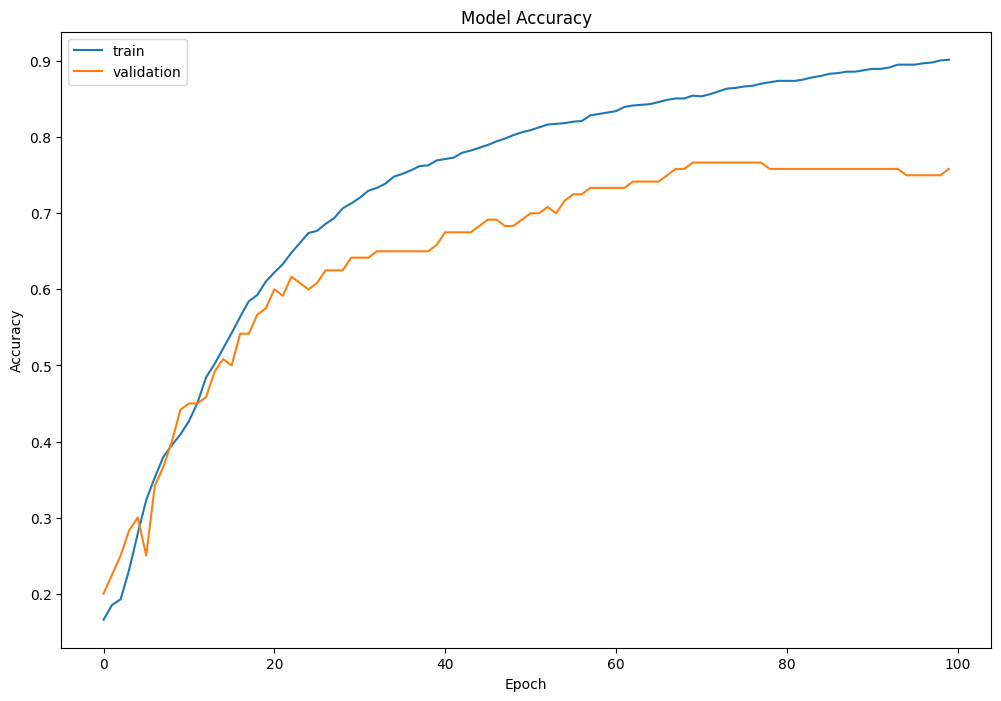

In [16]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')